In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline

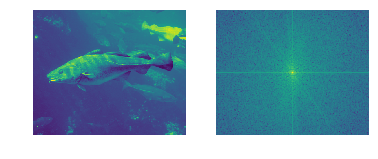

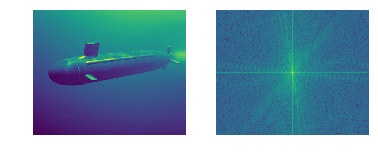

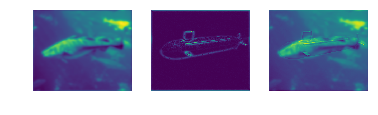

True

In [2]:
from scipy.misc.pilutil import imread, imsave,imresize
def fourier(path):
    img = cv2.imread(path)
    (image_h, image_w) = img.shape[:2]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    f= np.fft.fft2(img)
    fshift = np.fft.fftshift(f) 
    
    fft_img1 = 20 * np.log(np.abs(fshift))

    fig, ax = plt.subplots(1,2) 

    ax[0].imshow(img) 
    ax[1].imshow(fft_img1)

    ax[0].axis("off"), ax[1].axis("off")

    plt.show()

    output = fshift
    return output

def GaussLowPassFilter(f_shift):
    D0 = 15
    (m, n) = f_shift.shape[:2]
    h1 = np.zeros((m, n))
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            D = np.sqrt((i - x0)**2 + (j - y0)**2)
            h1[i][j] = np.exp((-1)*D**2/2/(D0**2))
    
    return h1

def GaussHighPassFilter(f_shift):
    h = GaussLowPassFilter(f_shift)
    return 1-h

img1 = fourier("./data/fish.bmp")
img2 = fourier("./data/submarine.bmp")
low_pass = GaussLowPassFilter(img1)
high_pass = GaussHighPassFilter(img2)
low_img = np.multiply(low_pass, img1)
high_img = np.multiply(high_pass, img2)
hybrid = low_img + high_img

low_img1 = np.abs(np.fft.ifft2(np.fft.ifftshift(low_img)))
high_img1 = np.abs(np.fft.ifft2(np.fft.ifftshift(high_img)))
hybrid_img1 = np.abs(np.fft.ifft2(np.fft.ifftshift(hybrid)))

fig, ax = plt.subplots(1,3) 

ax[0].imshow(low_img1) 
ax[1].imshow(high_img1)
ax[2].imshow(hybrid_img1)

ax[0].axis("off"), ax[1].axis("off"), ax[2].axis("off")
plt.show()

cv2.imwrite("./data/output/fish.png", low_img1) 
cv2.imwrite("./data/output/submarine.png", high_img1)
cv2.imwrite("./data/output/hybrid.png", hybrid_img1)
